In [1]:
tar = 'http://torch7.s3-website-us-east-1.amazonaws.com/data/mnist.t7.tgz'

if not paths.dirp('mnist.t7') then
   os.execute('wget ' .. tar)
   os.execute('tar xvf ' .. paths.basename(tar))
end

trainFile = 'mnist.t7/train_32x32.t7'
testFile = 'mnist.t7/test_32x32.t7'

In [2]:
trainData = nil
testData = nil
trainData = torch.load(trainFile,'ascii')
testData = torch.load(testFile,'ascii')

trainData.data = trainData.data
trainData.labels = trainData.labels
testData.data = testData.data
testData.labels = testData.labels

classes = { '1','0'}

In [3]:
N=150
trainset = {};
trainset.data = torch.DoubleTensor( N*N , 1 , 32 , 64)
trainset.labels = torch.DoubleTensor( N*N , 1)
trsize = N*N

Nt=100
testset = {};
testset.data = torch.DoubleTensor( Nt*Nt , 1 , 32 , 64)
testset.labels = torch.DoubleTensor( Nt*Nt , 1)
tesize = Nt*Nt

In [4]:
function trainset:size() return N*N end
--build training set
n=1
for i = 1, N do
    for j = i+1, i+N do
        trainset.data[n] = torch.cat(trainData.data[i],trainData.data[j])
        if trainData.labels[i] == trainData.labels[j] then 
            trainset.labels[n][1] = 1 -- 1: same digit
        else
            trainset.labels[n][1] = 2 -- 2: different digits
        end
        n = n + 1
    end
end

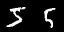

 1
[torch.DoubleTensor of size 1]



In [5]:
itorch.image(trainset.data[100]) -- display the 100-th image in dataset
print(trainset.labels[100])

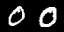

 1
[torch.DoubleTensor of size 1]



In [6]:
itorch.image(trainset.data[200]) -- display the 100-th image in dataset
print(trainset.labels[200])

In [7]:
--build test set
function testset:size() return Nt*Nt end
n=1
for i = 1, Nt do
    for j = i+1, i+Nt do
        testset.data[n] = torch.cat(testData.data[i],testData.data[j])
        if testData.labels[i] == testData.labels[j] then 
            testset.labels[n][1] = 1
        else
            testset.labels[n][1] = 2
        end
        n = n + 1
    end
end

In [8]:
print(trainset)

{
  data : DoubleTensor - size: 22500x1x32x64
  size : function: 0x058ac818
  labels : DoubleTensor - size: 22500x1
}


In [9]:
print(#trainset.labels)

 22500
     1
[torch.LongStorage of size 2]



In [10]:
trainset.data[1]

(1,.,.) = 
 Columns 1 to 15
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    3
    0    0    0    0    0    0    0    0    0    0   30   36   94  154  170
    0    0    0    0    0    0    0    0    0   49  238  253  253  253  253
    0    0    0    0    0    0    0    0    0   18  219  253  253  253  253
    0    0    0    0    0    0    0    0    0    0   80  156  107  253  253
    0    0    0    0    0    0    0    0    0    0    0   14

253  250  182    0    0    0    0    0    0    0    0
  253  253  253  253  201   78    0    0    0    0    0    0    0    0    0
  253  253  198   81    2    0    0    0    0    0    0    0    0    0    0
  195   80    9    0    0    0    0    0    0    0    0    0    0    0    0
   11    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0

Columns 31 to 45
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0 

7    0    0    0    0
  238  253  253  190  114  253  228   47   79  255  168    0    0    0    0
  252  252  179   12   75  121   21    0    0  253  243   50    0    0    0
  233  208   84    0    0    0    0    0    0  253  252  165    0    0    0
   71   19   28    0    0    0    0    0    0  253  252  195    0    0    0
    0    0    0    0    0    0    0    0    0  253  252  195    0    0    0
    0    0    0    0    0    0    0    0    0  255  253  196    0    0    0
    0    0    0    0    0    0    0    0    0  253  252  148    0    0    0
    0    0    0    0    0    0    0    7  135  253  186   12    0    0    0
    0    0    0    0    0    0    7  131  252  225   71    0    0    0    0
    0    0    0    0    0   48  165  252  173    0    0    0    0    0    0
    0    0    0    0  114  238  253  162    0    0    0    0    0    0    0
   29   85  178  225  253  223  167   56    0    0    0    0    0    0    0
  215  252  252  252  196  130    0    0    0    0    0    0    0 

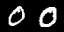

 1
[torch.DoubleTensor of size 1]



In [11]:
itorch.image(trainset.data[200]) -- display the 100-th image in dataset
print(trainset.labels[200])

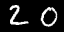

 2
[torch.DoubleTensor of size 1]



In [12]:
itorch.image(testset.data[200]) -- display the 100-th image in dataset
print(testset.labels[200])

In [13]:
-- ignore setmetatable for now, it is a feature beyond the scope of this tutorial. It sets the index operator.
setmetatable(trainset, 
    {__index = function(t, i) 
                   return {t.data[i], t.labels[i]} 
                end}
);
trainset.data = trainset.data:double() -- convert the data from a ByteTensor to a DoubleTensor.

function trainset:size() 
    return self.data:size(1) 
end

In [14]:
print(trainset:size()) -- just to test

22500	


In [15]:
trainset

{
  data : DoubleTensor - size: 22500x1x32x64
  size : function: 0x29dcbd60
  labels : DoubleTensor - size: 22500x1
}


{
  1 : DoubleTensor - size: 1x32x64
  2 : DoubleTensor - size: 1
}


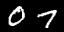

In [16]:
print(trainset[250]) -- load sample number 33.
itorch.image(trainset[250][1])

In [17]:
require 'nn'
net = nn.Sequential()
net:add(nn.SpatialConvolution(1, 6, 5, 5)) -- 3 input image channels, 6 output channels, 5x5 convolution kernel
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))     -- A max-pooling operation that looks at 2x2 windows and finds the max.
net:add(nn.SpatialConvolution(6, 16, 5, 5))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.SpatialMaxPooling(2,2,2,2))
net:add(nn.View(16*5*13))                    -- reshapes from a 3D tensor of 16x5x5 into 1D tensor of 16*5*5
net:add(nn.Linear(16*5*13, 120))             -- fully connected layer (matrix multiplication between input and weights)
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(120, 84))
net:add(nn.ReLU())                       -- non-linearity 
net:add(nn.Linear(84, 2))                   -- 2 is the number of outputs of the network (in this case, 10 digits)
net:add(nn.LogSoftMax())                     -- converts the output to a log-probability. Useful for classification problems

criterion = nn.ClassNLLCriterion()

trainer = nn.StochasticGradient(net, criterion)
trainer.learningRate = 0.001
trainer.maxIteration = 10 -- just do 5 epochs of training.

In [18]:
trainer:train(trainset)

# StochasticGradient: training	


# current error = 0.17279644048802	


# current error = 0.027492289434312	


# current error = 0.0085097786046916	


# current error = 0.00030367461026086	


# current error = 5.4418107024594e-05	


# current error = 3.405439633588e-05	


# current error = 2.5352449137012e-05	


# current error = 2.0163968745685e-05	


# current error = 1.6708558561611e-05	


# current error = 1.4229558246631e-05	
# StochasticGradient: you have reached the maximum number of iterations	
# training error = 1.4229558246631e-05	



In [19]:
testset.data = testset.data:double()

 2
[torch.DoubleTensor of size 1]



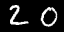

In [20]:
print(testset.labels[200])
itorch.image(testset.data[200])
predicted = net:forward(testset.data[200])

In [21]:
-- the output of the network is Log-Probabilities. To convert them to probabilities, you have to take e^x 
print(predicted:exp())

 8.4878e-11
 1.0000e+00
[torch.DoubleTensor of size 2]




In [22]:
for i=1,predicted:size(1) do
    print(classes[i], predicted[i])
end

In [23]:
correct = 0
for i=1,tesize do
    local groundtruth = testset.labels[i]
    local prediction = net:forward(testset.data[i])
    local confidences, indices = torch.sort(prediction, true)  -- true means sort in descending order
    
    if groundtruth[1] == indices[1] then
        correct = correct + 1
    end
end

In [24]:
print(correct, 100*correct/tesize .. ' % ')

9572	95.72 % 	
